In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os 
os.chdir('/content/drive/MyDrive/MaskRCNN')

In [2]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

     |████████████████████████████████| 92.6 MB 38 kB/s 
     |████████████████████████████████| 367 kB 45.6 MB/s 
     |████████████████████████████████| 3.2 MB 40.1 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you 

In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn import model as modellib

In [30]:
# define 2 classes that the Custom Model have
class_names = ['Mobile','Laptop']

In [31]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 2

Re-starting from epoch 2


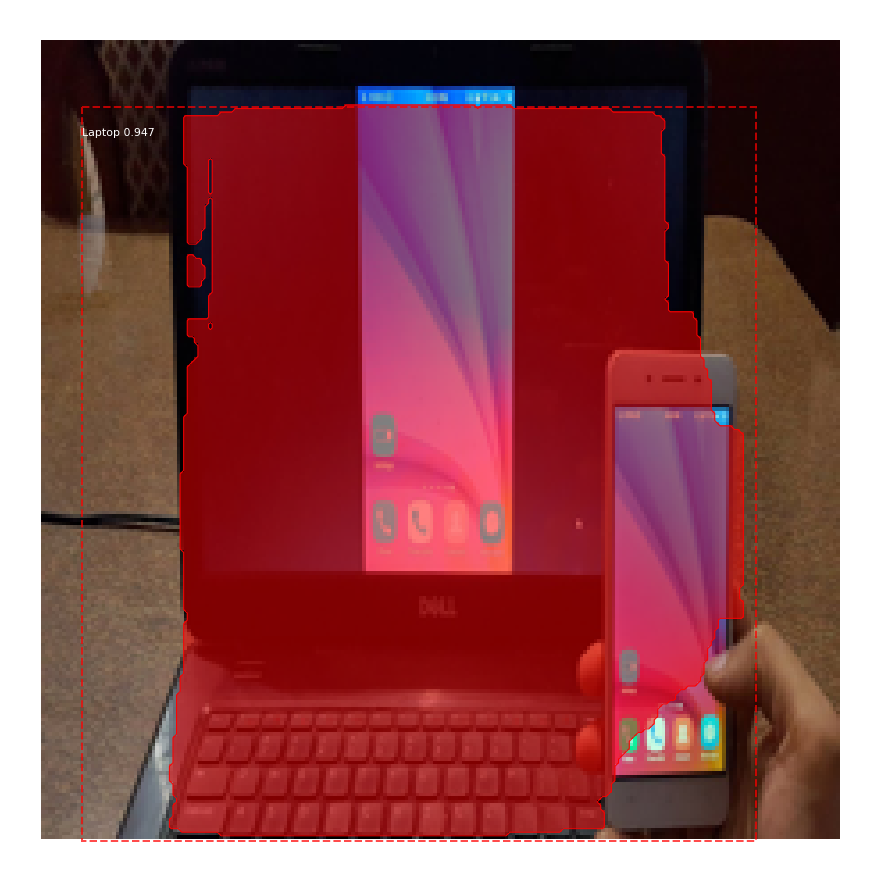

In [32]:
# define the model
rcnn = modellib.MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('/content/drive/MyDrive/MaskRCNN/log/object20211102T0415/mask_rcnn_object_0002.h5', by_name=True)

# load photograph
img = load_img('/content/drive/MyDrive/MaskRCNN/dataset/LaptopMobile/train/8.jpg',target_size=(224,224) )
img = img_to_array(img)

# make prediction
results = rcnn.detect([img], verbose=0)

# get dictionary for first prediction
r = results[0]

# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])